# Mapeo de Hénon


Vamos a analizar un poco sobre otro mapeo, el de Henon. El mapeo de Henon es un mapeo descrito de la forma:
$$ f_{a,b}(x,y)=\left\{ \begin{array}{lcc}
             a-by-x^{2}\\
             \\ x
             \end{array}
             \right.$$
        
        
Para poder analizarlo debemos linearizar el sistema. Primero obtenemos el jacobiano 

$$ DF_{a,b}(x,y)=\left( \begin{array}{lcc}
                \frac{\partial F_{x}}{\partial x} & \frac{\partial F_{x}}{\partial y}\\
                \\ \frac{\partial F_{y}}{\partial x} & \frac{\partial F_{y}}{\partial y}
                \end{array}
                \right)$$
                
            
$$DF_{a,b}(x,y)= \left( \begin{array}{lcc}
                -2x & -b\\
                \\ 1 & 0
                \end{array}
                \right)$$
                
Notamos que el determinante del jacobiano no es igual a uno sino
$$det(DF_{a,b}(x,y))=b$$
El determianate es constante , y sera hamiltoniano en el caso en que $b=1$. Analizaremos esos casos, primero encontrando los puntos fijos.
$$F_{a,b}(x,y)=\left( \begin{array}{lcc}
               a-by-x^{2}\\
               \\ x
               \end{array}
               \right) = \left(\begin{array}{lc}
               x \\
               \\ y
               \end{array}
               \right)$$
               
               
Lo que implica que 
$$a-by-x^{2}=x$$
$$x=y$$ 
de donde es claro que la primer ecuación queda
$$x^{2}+(b+1)x-a=0$$
que se puede resolver usando la fórmula general
$$x=\frac{-(b+1)\pm ((b+1)^{2}+4a)^{1/2} }{2}$$
para el caso en que $b=1$ se tiene
$$x=\frac{-2\pm 2(1+a)^{1/2} }{2}$$
Por lo que escogiendo un valor de a podemos obtenr un punto fijo. 

Para este caso usaremos un valor de $a=.3$ . Por lo que los puntos fijos asociados serán 
$$p_{1}=(0.14017542509913805
,0.14017542509913805
)$$
$$p_{2}=(-2.1401754250991383,-2.1401754250991383)$$

$$p_{1}=(2,2) ;p_{2}=(-4,-4)$$


In [1]:
using TaylorSeries
using PyPlot
using LinearAlgebra

In [2]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

Para revisar si es punto fijo:

In [3]:
Henon(-2.1401754250991383,-2.1401754250991383,0.3,1.0) .- [-2.1401754250991383,-2.1401754250991383]

2-element Array{Float64,1}:
 -8.88178e-16
  0.0        

In [4]:
"""

PolinomioTaylor1(g,Cθ,CP,TipoVariable)
   
   Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.




Argumentos:





   - g       : grado del polinomio
   - Cθ,CP  :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{Float64}}
   - TipoVariable :  es el tipo : Real, Float64, BigFloat, etc.
   

    Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales. 


"""
function PolinomioTaylor1(g::Real,Cθ,CP,TipoVariable)
    #=
    g es el grado del polinomio, CX y CP son
    arreglos que contienen los coeficientes que forman la variedad.
    
    
    Creamos x,p como variables tipo TaylorN de orden 2
    =#
    
    
    
    θ,p = set_variables(TipoVariable, "θ p", order=2)
    
    #especificamos que LX,LP son de arreglos que guardarán coeficientes del polinomio, sólo son auxiliares en esta función
    
   
    Lθ = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    LP = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    
   #usamos un condicional para separar el caso 1 del resto
    if g == 1
        
        T = [Taylor1([θ], g),Taylor1([p], g)]
    #en el caso en que g>1 entonces usamos las listas que van guardando los coeficientes
    else
        #como CX,CP están guardando los coeficientes pero necesitamos agregar el último término que será una variable 
        
        Lθ = push!(Cθ, θ) 
        LP = push!(CP, p)

        T=[Taylor1(Lθ, g),Taylor1(LP, g)]
        
    end
    return T
end
#Esta función regresa tθ,tp que son Taylor1.TaylorN

PolinomioTaylor1

In [5]:
#=Esta función toma el arreglo que contiene las lambdas que se van calculando, los coeficientes de los polinomios
y el orden de los mismos, lo que hace es generar el lado derecho de la ecuación cohomológica, multiplicando a_n*λ^n
y generando un polinomio de gradno g con estos coeficientes
=#
"""
Vecλ(λ_v,g,Cθ,CP)
Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio.
Regresa un arreglo de tipo TaylorSeries.TaylorN{Float64}


Sus argumentos son:
-g      :  grado del polinomio.
-λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias. 
-Cθ,CP  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.

"""
function Vecλ(λ_v,g,Cθ,CP)
   # el arreglo de λ_v contiene los arreglos que corresponden a la parte derecha de la ecuación cohomológica
    # en θ,p. Es importante hacer la distinción puesto que dependiendo del punto fijo donde se esté calculando
    # el primer valor de λ en θ serpa diferente del primer valor de λ en P
    θλt=Taylor1(λ_v[1].*Cθ,g)
    pλt=Taylor1(λ_v[2].*CP,g)
    
    λvec=[θλt,pλt]
    
    return λvec
end

Vecλ

In [6]:
function ValPropios(M)
    V = BigFloat[]
    disc = trace(M)^2-4.*det(M)
    disc >= 0.? v = ((trace(M) + sqrt(trace(M)^2-4.*det(M)))/2.,(trace(M) - sqrt(trace(M)^2-4.*det(M)))/2.)  : error("Error: el valor propio es complejo, es decir es un punto elíptico")
    v_prop1 = v[1]
    v_prop2 = v[2]
    # dado que hay unos casos en los que esto truena, 
    #debo integrag alguna forma de revisar que no sea el caso que estamos calculando
    push!(V,v_prop1)
    push!(V,v_prop2)
    ValoresP = sort(V,rev=true)
return ValoresP
end
        
    
    
    

ValPropios (generic function with 1 method)

In [7]:
function VecPropios(M,ValoresP)
    Vectores = []
    for i in [1,2]
        y = big.(1.)
        I_2 = big.([1. 0.; 0. 1.])
        M_aux = -I_2.*ValoresP[i]+M
        x = -(y*M_aux[3])/M_aux[1]
        push!(Vectores,x)
        push!(Vectores,y)
    end
    return Vectores
end

VecPropios (generic function with 1 method)

In [8]:
function EigenValores(M)
    ValoresP  = ValPropios(M)
    VectoresP = VecPropios(M,ValoresP)
    V = (ValoresP,[VectoresP[1] VectoresP[3];VectoresP[2] VectoresP[4]])
    return V
end

EigenValores (generic function with 1 method)

In [9]:
function Orden1(Cθ,CP,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayθ,λarrayP)
            #usamos la función PolinomioTaylor para crear el polinomio tipo Taylor1.TaylorN{T}
            t = PolinomioTaylor1(1,Cθ,CP,TipoVariable)
            #@show(typeof(t))
            #Aplicamos el mapeo a los polinomios que resultan de la función anterior.
            Or1 = Mapeo(t[1],t[2],k,l)
            @show(Or1)
            #@show(typeof(Or1))
            AuxOr1=[Or1[1][1],Or1[2][1]]
            @show(AuxOr1)
            #@show(typeof(AuxOr1))
            #Calculamos el jacobiano del Orden 1 para obtener sus valores y vectores propios.
            JPO = jacobian(AuxOr1,[PuntoFijo[1],PuntoFijo[2]])
            @show(JPO)
            #@show(typeof(JPO))
            #@show(JPO)
            #@show(det(JPO))
            
            
            #Calculamos los valores y vectores propios
            if TipoVariable == BigFloat
                eigval,eigvec = EigenValores(JPO)
            else
                eigval,eigvec = eig(JPO)
            end
            #escogemos el tipo de variedad que queremos calcular. Como se ordenan de menor a mayor la inestable es la segunda
            λ = eigval[tipo_v]
            @show(eigval,eigvec)
            tt = imag(λ)
            @show(λ)
            #Ponemos los coeficientes en una variable nueva cada uno y los agregamos a las listas CX,CP,λ
            tt == 0.?  Coef = eigvec[:,tipo_v] : error("Error: el valor propio es complejo, es decir es un punto elíptico")
            #@show(typeof(Coef[1]))
            #@show(Coefθ,CoefP)
            push!(Cθ, Coef[1])
            push!(CP, Coef[2])
            push!(λarrayθ, λ)
            push!(λarrayP, λ)
            λ_v=[λarrayθ,λarrayP]
            
            #@show(λarray)  
            #@show(typeof(Cθ))
            #@show(typeof(λarrayθ))
    return Cθ, CP,λarrayθ,λarrayP, λ_v
end
            
    

Orden1 (generic function with 1 method)

In [10]:
#Creamos una función que reciba el orden del polinomio , el punto fijo, el parámetro k y 
#el tipo de varidad que queremos(estable=1, inestable=2)
"""
Variedades(Mapeo,orden, PuntoFijo,k,tipo_v,TipoVariable)
Es una función que calcula las variedades de cierto mapeo. Usa las funciones de PolinomioTaylor1 y Vecλ para calcular los
polinomios de cada lado de la ecuación cohomológica y les aplica el mapeo dado. 



Argumentos:


- Mapeo : Mapeo de dos dimensiones, debe recibir al menos dos parámetros que son los polinomios antes calculados.
- orden : se trata del orden del polinomio.
- PuntoFijo : ES el punto fijo donde queremos calcular la variedad.
- k     : Es la constante del mapeo.
- tipo_v : 1 si la variedad es estable, 2 si es inestable.
- TipoVariable :  Float64,BigFloat, Integer,etc.


"""
function Variedades(Mapeo,orden, PuntoFijo,k,l,tipo_v, TipoVariable)
   
    #definimos unas listas donde se guardarán los coeficientes  de todo el polinomio, tales deben ser
    # de tipo "Array{TaylorSeries.TaylorN{Int64},1}" dado que los términos que se van agregando 
    # en cada orden son de tipo TaylorN.
    
    a=TipoVariable(PuntoFijo[1])
    b=TipoVariable(PuntoFijo[2])
    Cθ = [a+TaylorN(0.)]
    CP = [b+TaylorN(0.)]
    
    
    #λarray es la lista que contiene a los coeficientes del polinomio de λ
    λarrayθ = [a^0]
    λarrayP = [b^0]
    
    #definimos un vector que contiene el punto en el que se evalúa el jacobiano que se calcula después
    #dado que sólo lo usamos para obtener los valores que resultaron en el mapeo evaluamos siempre en [1.,1.]
    
    
    
    
    Cθ,CP,λarayθ, λarrayP,λ_v = Orden1(Cθ,CP,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayθ,λarrayP)
    


    for g in 2:orden
        
            #Creamos los polinomios con las listas correspondientes 
            t = PolinomioTaylor1(g,Cθ,CP,TipoVariable)
            
            # aplicamos el mapeo estándar y al resultado le llamamos OrG por Orden g.
            OrG = Mapeo(t[1],t[2],k,l)
            
            push!(λarrayθ,λarrayθ[2]^g)
            push!(λarrayP,λarrayP[2]^g)
            λ_v=[λarrayθ,λarrayP]
            
            #agregamos el término correspondiente a λ 
            λ_vec=Vecλ(λ_v,g,Cθ,CP)
            
            
            #@show(λvec)
            
            # ahora ya tengo las dos partes de la ecuación y debo igualarlas para resolver.
            EcuaCohomo=OrG-λ_vec
            
            
            # de esta ecuación necesitamos solo los de orden g, así que los extraemos manualmente 
            θ_g=EcuaCohomo[1].coeffs[g+1]
            p_g=EcuaCohomo[2].coeffs[g+1]
            vec_orden_g=[θ_g,p_g]
            
            
            #calculamos el término independiene en la ecuación
            θ_ind=EcuaCohomo[1].coeffs[g+1].coeffs[1].coeffs[1]
            p_ind=EcuaCohomo[2].coeffs[g+1].coeffs[1].coeffs[1]
            vec_ind=[-θ_ind,-p_ind]
            
            #calculamos el jacobiano
            JacOrdenG = jacobian(vec_orden_g)
            
            
            
            
            #Con esta información podemos evaluar lo siguiente:
            # Si el vector de términos independientes es cero y el determinante del jacobiano es distinto de cero
            # entonces la solución a la ecuación cohomológica es la trivial
            if norm(vec_ind)==0.
                if det(JacOrdenG)!=0.
                    
                    Cθ[g+1]=0.
                    CP[g+1]=0.
                end
            else
                # Si el vector de términos independientes es distinto de ceroentonces necesitamos 
                #resolver la ecuación JacOrdenG[x_g,p_g]*[x,p]**=vec_ind[x_g,p_g]
                # entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
                TermG=JacOrdenG \ vec_ind
                
                Cθ[g+1]=TermG[1]
                CP[g+1]=TermG[2]
            
            end
            

    end
    return Cθ,CP,λarrayθ, λarrayP
end

Variedades

In [11]:
"""
PolinomioCohomo(Mapeo,Pol_vec,λvec, k)
Esta función calcula la ecuación cohomológica con los polinomios que ya se calcularon. Regresa un arreglo de dos 
elementos que son los valores de x,θ del mapeo.


Argumentos:
-Mapeo : función o mapeo del cual calculamos las variedades.Debe ser una función que reciba tres parámetros
 que son dos de sus variables y la constante del mapeo. Como salida debe tener un arreglo de dos elementos. 
-Pol_vec : Es un arreglo de dos elementos que son los polinomios calculados con anterioridad. 
-k     : es el valor de la constante del mapeo 
-λvec : 

"""
function PolinomioCohomo(Mapeo,Pol_vec,λvec, k,l ,PuntoFijo,modulo)
    Map_vec=Mapeo(Pol_vec[1],Pol_vec[2],k,l)
    if modulo==2*pi
        Ec_Cohomo = mod(Map_vec-λvec,modulo)
    else
        Ec_Cohomo = Map_vec-λvec
    end
    return Ec_Cohomo
end

PolinomioCohomo

In [12]:
"""
EvaluarPol(Ec_2var,Tiempo,paso)

Es una función que toma un arreglo de dos dimensiones que contiene polinomios y los evalúa en el tiempo dado en los pasos deseados




Argumentos:

-Ec_2var : Arreglo de dos dimensiones que contiene polinomios en cada una de ellas. 
-Tiempo  : Valor hasta el cual se quiere evaluar cada polinomio
-paso    : es el paso que se considera en cada evaluación del polinomio. 

"""
function EvaluarPol(Ec_2var,Tiempo,paso,TipoVariable)
    
    
    
    
    
    Val=TipoVariable[]
    Tiem=TipoVariable[]
    
    
    for t = 0:paso:Tiempo
        x = evaluate(Ec_2var[1], t)
        y = evaluate(Ec_2var[2], t)

        
        norma = norm([x,y],Inf)
        push!(Val,norma)
        push!(Tiem,t)
    
    end
    return Tiem,Val
end

EvaluarPol

In [13]:
"""
CreaPol es una función que dadas dos listas y un grado crea  un arreglo de dos entradas , en cada una de ellas se encuentra 
el polinomio de grado g con los coeficientes de las listas. 


Argumentos:


- A,B : arreglos que contienen lo que serán los coeficientes del polinomio.
- orden : grado del polinomio
"""
function CreaPol(A,B,orden)
    Taylor = [Taylor1(A,orden),Taylor1(B,orden)]
    return Taylor
end

CreaPol

In [14]:
function MetParametrización(Mapeo,modulo,orden,PuntoFijo,k,l,tipo_v,Tiempo,paso, TipoVariable)
    Coeficienteθ,CoeficienteP,λarrayθ,λarrayP = Variedades(Mapeo,orden,PuntoFijo,k,l,tipo_v,TipoVariable)
        
    
    θ = TipoVariable[]
    P = TipoVariable[]
    
    for i in 1:orden+1
            
        push!(θ,Coeficienteθ[i].coeffs[1].coeffs[1])
        push!(P,CoeficienteP[i].coeffs[1].coeffs[1])
        
    end
    
    Taylor=CreaPol(θ,P,orden)
    
    λ_vec=CreaPol(θ.*λarrayθ,P.*λarrayP,orden)
    
    
    
    Ecua_Cohomo = PolinomioCohomo(Mapeo,Taylor,λ_vec, k,l,PuntoFijo,modulo)
    Valor_t , Error = EvaluarPol(Ecua_Cohomo,Tiempo,paso, TipoVariable)
    ErrorV = [Valor_t,Error]
    
    
    return Taylor,ErrorV,λ_vec
   
end

MetParametrización (generic function with 1 method)

In [15]:
using PyPlot

Graficamos ahora varios casos dejando b=1 y variando el valor de a para observar el comportamiento del sistema.

## Primero con a=1.

In [16]:
parametro = 1.
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)


x1 = 0.41421356237309515
x2 = -2.414213562373095


-2.414213562373095

In [ ]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [0.414213,0.414213], parametro, 1., 2, 60., 0.125, Float64)

In [20]:
Polinomio2,E2,ValProp2 = MetParametrización(Henon,1., 25, [-2.4142,-2.4142], parametro, 1., 2, 60., 0.125, Float64)

Or1 = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}[  1.0 - 1.0 p - 1.0 θ² + 𝒪(‖x‖³) + 𝒪(t²),  1.0 θ + 𝒪(‖x‖³) + 𝒪(t²)]
AuxOr1 = TaylorSeries.TaylorN{Float64}[ 1.0 - 1.0 p - 1.0 θ² + 𝒪(‖x‖³), 1.0 θ + 𝒪(‖x‖³)]
JPO = [4.8284 -1.0; 1.0 0.0]
eigval = [4.61155,0.216847]
eigvec = [0.977287 0.211921; 0.211921 0.977287]
λ = 0.21684667383690884


(TaylorSeries.Taylor1{Float64}[ - 2.4142 + 0.21192137439362693 t - 0.0027243276967052607 t² + 1.2382293092773488e-5 t³ - 2.831722539777983e-8 t⁴ + 3.819157016994805e-11 t⁵ - 3.368297494978974e-14 t⁶ + 2.0826497798048376e-17 t⁷ - 9.485016258551467e-21 t⁸ + 3.3020177357378875e-24 t⁹ - 9.046460002403854e-28 t¹⁰ + 1.996850320471073e-31 t¹¹ - 3.620657675684361e-35 t¹² + 5.48064527473795e-39 t¹³ - 7.021486410605729e-43 t¹⁴ + 7.703368698029748e-47 t¹⁵ - 7.311548314862399e-51 t¹⁶ + 6.057405019574204e-55 t¹⁷ - 4.414967802617731e-59 t¹⁸ + 2.851089250976713e-63 t¹⁹ - 1.640840135963052e-67 t²⁰ + 8.469068602503307e-72 t²¹ - 3.9349620622168395e-76 t²² + 1.5720285227251218e-80 t²³ - 6.396600434265631e-85 t²⁴ + 2.6027833798281377e-89 t²⁵ + 𝒪(t²⁶), - 2.4142 + 0.9772867189699839 t - 0.05793670813114867 t² + 0.0012143469454015813 t³ - 1.2806770818273787e-5 t⁴ + 7.965328455894917e-8 t⁵ - 3.239618365808723e-10 t⁶ + 9.237339165706473e-13 t⁷ - 1.9400635658704606e-15 t⁸ + 3.114616046100214e-18 t⁹ - 3.93505690

In [19]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [-2.4142,-2.4142], parametro, 1., 1, 60., 0.125, Float64)

Or1 = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}[  1.0 - 1.0 p - 1.0 θ² + 𝒪(‖x‖³) + 𝒪(t²),  1.0 θ + 𝒪(‖x‖³) + 𝒪(t²)]
AuxOr1 = TaylorSeries.TaylorN{Float64}[ 1.0 - 1.0 p - 1.0 θ² + 𝒪(‖x‖³), 1.0 θ + 𝒪(‖x‖³)]
JPO = [4.8284 -1.0; 1.0 0.0]
eigval = [4.61155,0.216847]
eigvec = [0.977287 0.211921; 0.211921 0.977287]
λ = 4.611553326163092


(TaylorSeries.Taylor1{Float64}[ - 2.4142 + 0.9772867189699839 t - 0.05793670813114862 t² + 0.0012143469454015798 t³ - 1.2806770818273748e-5 t⁴ + 7.965328455894868e-8 t⁵ - 3.239618365808674e-10 t⁶ + 9.237339165706188e-13 t⁷ - 1.9400635658703963e-15 t⁸ + 3.114616046100237e-18 t⁹ - 3.935056908411283e-21 t¹⁰ + 4.005577118601354e-24 t¹¹ - 3.349301809140046e-27 t¹² + 2.3380066673552257e-30 t¹³ - 1.3813074747691937e-33 t¹⁴ + 6.98858457321951e-37 t¹⁵ - 3.058894945318386e-40 t¹⁶ + 1.168663481591454e-43 t¹⁷ - 3.9281397857606936e-47 t¹⁸ + 1.1697846542446172e-50 t¹⁹ - 3.105850962765963e-54 t²⁰ + 7.39396001580301e-58 t²¹ - 1.5864661293514438e-61 t²² + 3.082314837953396e-65 t²³ - 5.445979563909048e-69 t²⁴ + 8.784850719461345e-73 t²⁵ + 𝒪(t²⁶), - 2.4142 + 0.21192137439362685 t - 0.0027243276967052585 t² + 1.2382293092773443e-5 t³ - 2.831722539777945e-8 t⁴ + 3.819157016994429e-11 t⁵ - 3.3682974949799456e-14 t⁶ + 2.0826497798050373e-17 t⁷ - 9.485016258590047e-21 t⁸ + 3.3020177356689503e-24 t⁹ - 9.046460

Graficaremos el error cometido que es el que nos dirá cuanta diferencia hay entre tipos de números. 

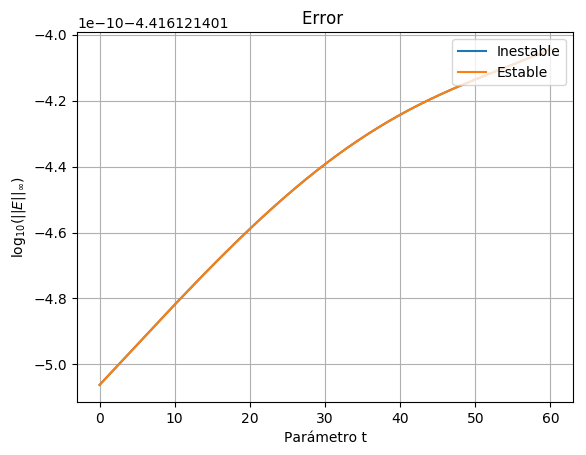

PyObject <matplotlib.legend.Legend object at 0x7fa6ccba0e50>

In [21]:
plot(E2[1],log10(E2[2]),marker= "None", label="Inestable")
plot(E2[1],log10(E2[2]),marker= "None", label="Estable")
xlabel("Parámetro t")
ylabel(L"$\log_{10}(|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Para observar cómo va la variedad graficaremos el espacio fase

In [22]:
#esta es una función para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del parámetro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
function evaluar(Tiempo, paso,A,B,vari)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = 0:paso:Tiempo
        #=
        x = mod(evaluate(A,t),2*pi)
        y = mod(evaluate(B,t),2*pi)
        =#
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",label = vari)
    
end

evaluar (generic function with 1 method)

In [23]:
function Graficar(Tiempo, paso, k,l,A,B,vari)
    #graficarMap(k,l)
    evaluar(Tiempo,paso,A,B,vari)
end

Graficar (generic function with 1 method)

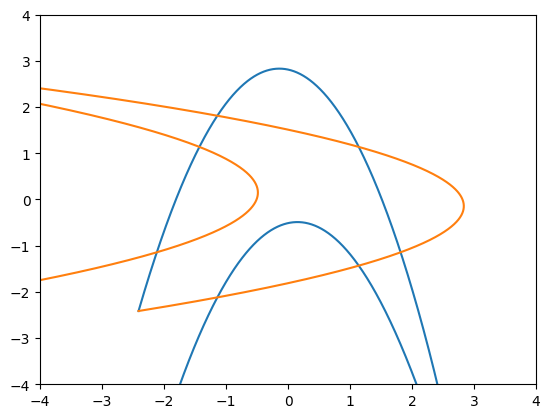

(-4.0,4.0)

In [24]:
Graficar(180.7,0.025,8.,1.,Polinomio2[1],Polinomio2[2],"inestable")
Graficar(180.7,0.025,8.,1.,Polinomio1[1],Polinomio1[2],"estable")
#Graficar(60.7,0.025,8.,1.,PolinomioB[1],PolinomioB[2],"inestable")
xlim(-4.0,4.0)
ylim(-4.0,4.0)

## Con a=2

In [ ]:
parametro = 2.
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)


In [ ]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [x1,x1], parametro, 1., 1, 60., 0.125, Float64)

In [ ]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [x2,x2], parametro, 1., 1, 60., 0.125, Float64)

In [ ]:
Polinomio2,E2,ValProp2 = MetParametrización(Henon,1., 25, [x2,x2], parametro, 1., 2, 60., 0.125, Float64)

In [ ]:
plot(E2[1],log10(E2[2]),marker= "None", label="Inestable")
plot(E2[1],log10(E2[2]),marker= "None", label="Estable")
xlabel("Parámetro t")
ylabel(L"$\log_{10}(|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

In [ ]:
Graficar(180,0.025,8.,1.,Polinomio2[1],Polinomio2[2],"inestable")
Graficar(180,0.025,8.,1.,Polinomio1[1],Polinomio1[2],"estable")
#xlim(-4,4)
#ylim(-4,4)

## Con a=3

In [ ]:
parametro = 3.
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)


In [ ]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [1.,1.], parametro, 1., 1, 60., 0.125, Float64)

In [ ]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [-3.,-3.], parametro, 1., 1, 60., 0.125, Float64)

In [ ]:
Polinomio2,E2,ValProp2 = MetParametrización(Henon,1., 25, [-3.,-3.], parametro, 1., 2, 60., 0.125, Float64)

In [ ]:
plot(E2[1],log10(E2[2]),marker= "None", label="Inestable")
plot(E2[1],log10(E2[2]),marker= "None", label="Estable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

In [ ]:
Graficar(290.7,0.025,8.,1.,Polinomio2[1],Polinomio2[2],"inestable")
Graficar(290.7,0.025,8.,1.,Polinomio1[1],Polinomio1[2],"estable")

## Con a=4

In [ ]:
parametro = 12.5
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)

In [ ]:
Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [x2,x2], parametro, 1., 1, 60., 0.125, Float64)

In [ ]:
Polinomio2,E2,ValProp2 = MetParametrización(Henon,1., 25, [x2,x2],parametro, 1., 2, 60., 0.125, Float64)




In [ ]:
plot(E2[1],log10(E2[2]),marker= "None", label="Inestable")
plot(E2[1],log10(E2[2]),marker= "None", label="Estable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

In [ ]:
Graficar(360.7,0.025,8.,1.,Polinomio2[1],Polinomio2[2],"inestable")
Graficar(360.7,0.025,8.,1.,Polinomio1[1],Polinomio1[2],"estable")
xlim(-10,10)
ylim(-10,10)
